In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


# Keras tutorial

* The aim of this tutorial is to introduce Keras DL library.

* I am **not** going to teach machine learning or how NNs work.

* If you would like to learn about NNs [here is a tutorial](https://www.youtube.com/watch?v=yx22I4SqO1g) I did previously.

* We will focus on MLP.

<img src=https://i.imgur.com/OFNAslJ.png width="500">

## 1. What is Keras?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 9


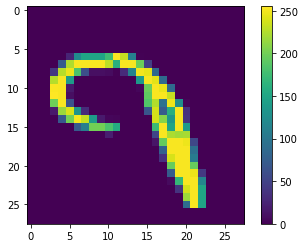

In [4]:
# Visualize the dataset
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
plt.colorbar()
print('Label:', y_train[index])

In [5]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
# STEP 1: PREPROCESSING
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
# STEP 2: Architecture
model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
# STEP 3: Configure learning
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# STEP 4: Train
model.fit(x_train, y_train)
# STEP 5: Test
eval_metrics = model.evaluate(x_test, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
activation (Activation)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
____________________________________________________

<img src=https://i.imgur.com/P8hdhj1.png width="300" align="left">

|Model dev steps| High level | Low level | Challenges |
| --- | --- | --- | --- |
|Input: Raw data|  |  |  |
|1. Preprocessing| Normalize, Reshape | Normalization as a layer | Reshape as a layer |
|2. Architecture| Type, #layers, #nodes | Functional API, change init | Skip connection |
|3. Configure learning| .compile(Optimizer, Loss) | change LR | Accuracy on digit 8 |
|4. Train| .fit(x_train, y_train) | Early stopping | ModelCheckpoint |
|5. Analyze| .evaluate(x_test, y_test) | History | Plot top 20 losses |
|Output: Model|  |  |  |

## 2. High level

|Model dev steps| High level |
| --- | --- |
|Input: Raw data|  |
|1. Preprocessing| Normalize, Reshape |
|2. Architecture| Type, #layers, #nodes |
|3. Configure learning| .compile(Optimizer, Loss) |
|4. Train| .fit(x_train, y_train) |
|5. Analyze| .evaluate(x_test, y_test) |
|Output: Model|  |

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 0


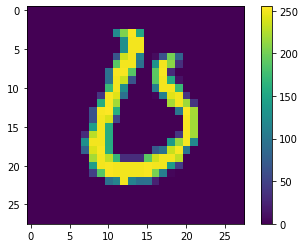

In [8]:
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
plt.colorbar()
print('Label:', y_train[index])

In [9]:
# STEP 1: PREPROCESSING
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

In [10]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [11]:
# STEP 2: Architecture
from keras.models import Sequential
from keras.layers import Dense, Activation

In [12]:
model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_3 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
activation_4 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
__________________________________________________

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.6384 - accuracy: 0.8111


In [15]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1645 - accuracy: 0.9513 - val_loss: 0.1561 - val_accuracy: 0.9527
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1315 - accuracy: 0.9604 - val_loss: 0.1314 - val_accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9674 - val_loss: 0.1279 - val_accuracy: 0.9612
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0961 - accuracy: 0.9706 - val_loss: 0.1120 - val_accuracy: 0.9654
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.1065 - val_accuracy: 0.9663


In [16]:
eval_metrics = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 951us/step - loss: 0.1065 - accuracy: 0.9663


## 3. Low level

|Model dev steps| High level | Low level |
| --- | --- | --- |
|Input: Raw data|  |  |
|1. Preprocessing| Normalize, Reshape | Normalization as a layer |
|2. Architecture| Type, #layers, #nodes | Functional API, change init |
|3. Configure learning| .compile(Optimizer, Loss) | change LR |
|4. Train| .fit(x_train, y_train) | Early stopping |
|5. Analyze| .evaluate(x_test, y_test) | History |
|Output: Model|  |  |

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 9


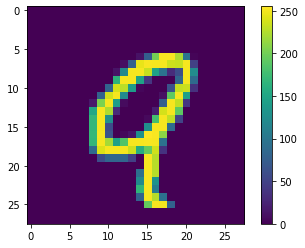

In [19]:
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
plt.colorbar()
print('Label:', y_train[index])

In [20]:
# STEP 1: PREPROCESSING
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

In [21]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [22]:
# STEP 2.1 Architecture Functional API
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Activation
from keras.layers.experimental.preprocessing import Rescaling

inp = Input(shape=(784))
x = Rescaling(scale=1/255)(inp)
x = Dense(30, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dense(30, kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

model = Model(inputs=inp, outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
rescaling (Rescaling)        (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_6 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
activation_7 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310   

In [23]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [25]:
H = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6359 - accuracy: 0.8073 - val_loss: 0.2022 - val_accuracy: 0.9439
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1881 - accuracy: 0.9449 - val_loss: 0.1677 - val_accuracy: 0.9514
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1486 - accuracy: 0.9551 - val_loss: 0.1481 - val_accuracy: 0.9574
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1243 - accuracy: 0.9630 - val_loss: 0.1309 - val_accuracy: 0.9614
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1039 - accuracy: 0.9679 - val_loss: 0.1329 - val_accuracy: 0.9607
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.1234 - val_accuracy: 0.9653
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0819 - accuracy: 0.9748 - val_loss: 0.1254 - val_ac

In [26]:
eval_metrics = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9689


In [27]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

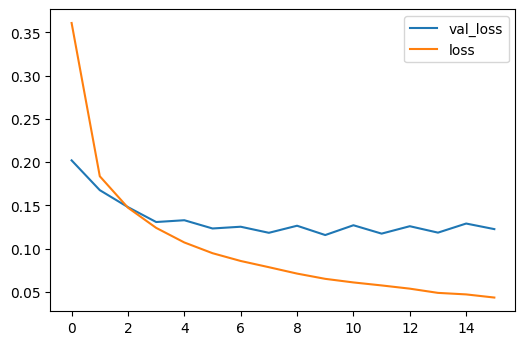

In [28]:
plt.figure(dpi=100)
plt.plot(H.history['val_loss'], label='val_loss')
plt.plot(H.history['loss'], label='loss')
plt.legend()

## 4. Challenges

|Model dev steps| High level | Low level | Challenges |
| --- | --- | --- | --- |
|Input: Raw data|  |  |  |
|1. Preprocessing| Normalize, Reshape | Normalization as a layer | Reshape as a layer |
|2. Architecture| Type, #layers, #nodes | Functional API, change init | Skip connection |
|3. Configure learning| .compile(Optimizer, Loss) | change LR | Accuracy on digit 8 |
|4. Train| .fit(x_train, y_train) | Early stopping | ModelCheckpoint |
|5. Analyze| .evaluate(x_test, y_test) | History | Plot top 20 losses |
|Output: Model|  |  |  |

**Challenge descriptions**

0. Start by repeating what I have shown so far
1. Do the reshaping operation as a layer to obtain an end-to-end NN. Pick the suitable layer from the [documentation](https://keras.io/api/layers/).
2. Using the Functional API, build a simple skip connection, fundamental building blocks of [ResNets](https://arxiv.org/abs/1512.03385).

<img src=https://i.imgur.com/ayexkaG.png width="300" align="center">
<img src=https://i.imgur.com/gJOGDm8.png width="200" align="center">

3. Say you are interested in the model accuracy on digit 8, implement it as a custom metric to be used in training.
4. Use model checkpoint callback to save best-so-far models in one training job.
5. Plot worst 20 model mistakes, inspired by [fastai](https://www.fast.ai/).

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 5


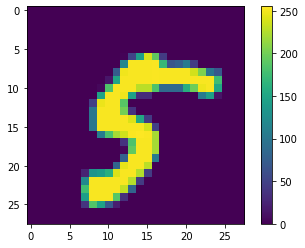

In [31]:
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
plt.colorbar()
print('Label:', y_train[index])

## 5. Solution

|Model dev steps| High level | Low level | Challenges |
| --- | --- | --- | --- |
|Input: Raw data|  |  |  |
|1. Preprocessing| Normalize, Reshape | Normalization as a layer | Reshape as a layer |
|2. Architecture| Type, #layers, #nodes | Functional API, change init | Skip connection |
|3. Configure learning| .compile(Optimizer, Loss) | change LR | Accuracy on digit 8 |
|4. Train| .fit(x_train, y_train) | Early stopping | ModelCheckpoint |
|5. Analyze| .evaluate(x_test, y_test) | History | Plot top 20 losses |
|Output: Model|  |  |  |

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Label: 7


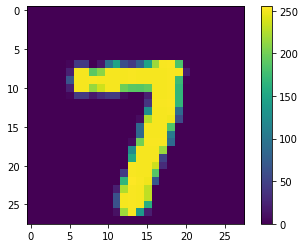

In [34]:
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
plt.colorbar()
print('Label:', y_train[index])

In [35]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [36]:
# STEP 2.1 Architecture Functional API
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Add
from keras.layers.experimental.preprocessing import Rescaling

inp = Input(shape=(28, 28))
x = Rescaling(scale=1/255)(inp)
x = Flatten()(x)
x = Dense(30, kernel_initializer='he_normal')(x)
o = Activation('relu')(x)
x = Dense(30, kernel_initializer='he_normal')(o)
x = Add()([x, o])
x = Activation('relu')(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

model = Model(inputs=inp, outputs=x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 28, 28)       0           input_2[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           rescaling_1[0][0]                
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           23550       flatten[0][0]                    
____________________________________________________________________________________________

In [37]:
import tensorflow as tf


def acc8(y_true, y_pred):
    '''
    Custom Keras metric
    Calculates the model accuracy on digit 8
    '''
    labels = tf.argmax(y_true, axis=-1)
    preds = tf.argmax(y_pred, axis=-1)
    tp = (labels == 8) & (preds == 8)
    tp = tf.reduce_sum(tf.cast(tp, tf.int32))
    tn = (labels != 8) & (preds != 8)
    tn = tf.reduce_sum(tf.cast(tn, tf.int32))
    return (tp+tn)/len(preds)

In [38]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', acc8])

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
filepath = "mnist-model-epoch-{epoch:02d}-val_acc-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [40]:
H = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[es, checkpoint])

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5362 - accuracy: 0.8408 - acc8: 0.9649 - val_loss: 0.1899 - val_accuracy: 0.9443 - val_acc8: 0.9866

Epoch 00001: val_accuracy improved from -inf to 0.94430, saving model to mnist-model-epoch-01-val_acc-0.9443.hdf5
Epoch 2/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1824 - accuracy: 0.9448 - acc8: 0.9855 - val_loss: 0.1573 - val_accuracy: 0.9522 - val_acc8: 0.9871

Epoch 00002: val_accuracy improved from 0.94430 to 0.95220, saving model to mnist-model-epoch-02-val_acc-0.9522.hdf5
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1403 - accuracy: 0.9590 - acc8: 0.9879 - val_loss: 0.1496 - val_accuracy: 0.9559 - val_acc8: 0.9879

Epoch 00003: val_accuracy improved from 0.95220 to 0.95590, saving model to mnist-model-epoch-03-val_acc-0.9559.hdf5
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1230 - accuracy: 0.9621 - acc8: 0

In [41]:
eval_metrics = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9639 - acc8: 0.9893


In [42]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'acc8', 'val_loss', 'val_accuracy', 'val_acc8'])

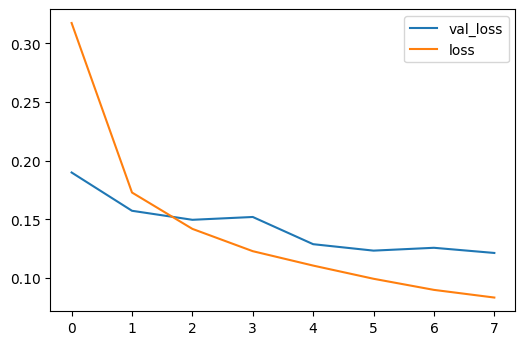

In [43]:
plt.figure(dpi=100)
plt.plot(H.history['val_loss'], label='val_loss')
plt.plot(H.history['loss'], label='loss')
plt.legend()

In [44]:
from keras.losses import CategoricalCrossentropy


def plot_top_20_losses(x_test, y_test, y_pred):
    # Calculate losses
    cce = CategoricalCrossentropy(reduction='none')
    losses = cce(y_test, y_pred).numpy()
    # Get sorted indices from small to high loss
    losses_sorted_indices = losses.argsort()
    # Plot top 20 errors
    fig = plt.figure(figsize=(10, 10))
    columns = 5
    rows = 4
    for i in range(1, 21):
        top_loss_index = losses_sorted_indices[-i]
        img = x_test[top_loss_index]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        pred = y_pred[top_loss_index].argmax()
        label = y_test[top_loss_index].argmax()
        plt.title('Pred:' + str(pred) + ' Label:' + str(label))
        plt.axis('off')
    plt.show()

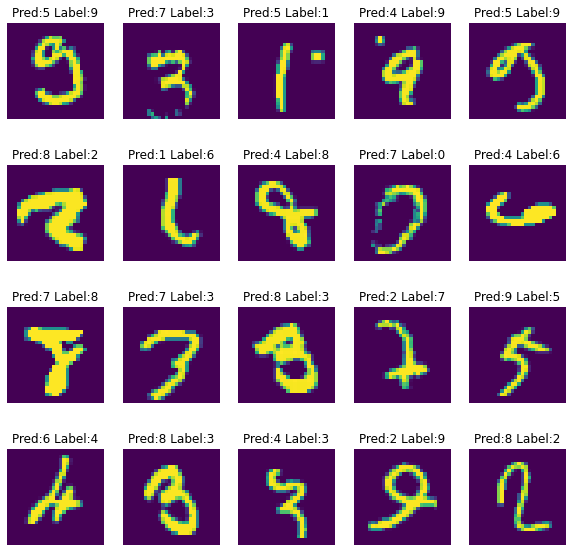

In [45]:
y_pred = model.predict(x_test)
plot_top_20_losses(x_test, y_test, y_pred)